<a href="https://colab.research.google.com/github/bdgToji/VNP/blob/main/KOL2_Boosting_Heart_Attack_2024_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Даден е датасет кој содржи податоци за пациенти. Целта е да се предвидат вредностите од колоната target, која означува дали пациентот ќе има или нема да има срцев удар - инфаркт (1/0) според дадените карактеристики на пациентите.

Поделете го dataset-от на множество за тренирање и тестирање во сооднос 70/30. Направете предпроцесирање на податоците. Креирајте Boosting базриран модел со соодветно подесени хипер параметри прикладен за овој dataset. Направете евалуација на моделот со употреба на F1 Score.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
from xgboost import cv, DMatrix, plot_importance, XGBClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/VNP/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Направете претпроцесирање на податоците

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: xlabel='target'>

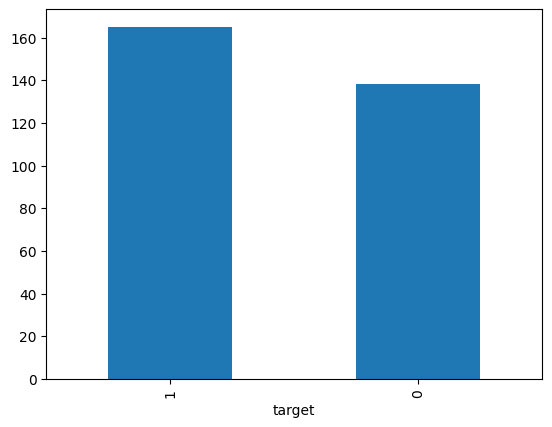

In [11]:
df['target'].value_counts().plot.bar()

# Поделето го на тренирачко и тестирачко множество во сооднос 80:20

In [12]:
X, Y = df.drop(columns=['target']), df['target']

In [15]:
data_dmatrix = DMatrix(data=X, label=Y)

params = {"objective":"binary:logistic",'colsample_bytree': 0.7,'learning_rate': 0.01,
                'max_depth': 3}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [16]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.899230,0.008258,0.810780,0.034331
1,0.933978,0.008924,0.869838,0.029713
2,0.948235,0.005113,0.897885,0.038398
3,0.946073,0.005195,0.897546,0.032461
4,0.948528,0.004719,0.890307,0.034654
5,0.950820,0.004730,0.897507,0.039331
6,0.949301,0.004753,0.897207,0.043619
7,0.948617,0.005601,0.895652,0.040018
8,0.947557,0.005327,0.895470,0.034207
9,0.948962,0.006245,0.894310,0.029397


# Искористете соодветен Boosting модел за проблемот

In [19]:
xgb_clf = XGBClassifier(**params)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

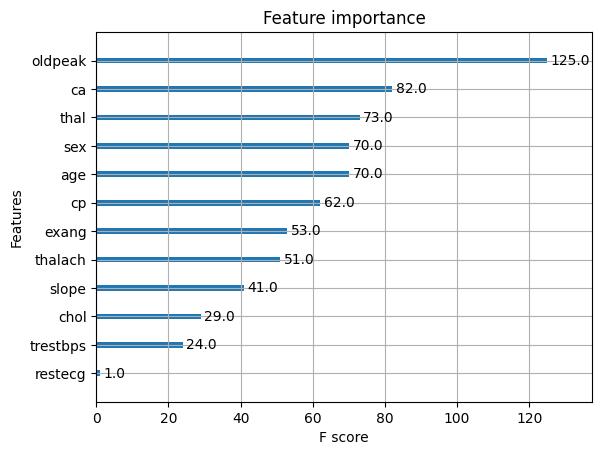

In [20]:
plot_importance(xgb_clf)

# Тестирајте го моделот на тестирачкото множество со метриките за евалуација на дадениот проблем

In [22]:
pred = xgb_clf.predict(X_test)

In [23]:
f1_score(Y_test, pred)

0.904109589041096